In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [161]:
import yaml

class parse(object):
    def __init__(self, path):
        with open(path, 'r') as file:
            self.parameters = yaml.safe_load(file)

    def __getitem__(self, key):
        return self.parameters[key]

    def save(self, filename):
        with open(filename, 'w') as f:
            yaml.dump(self.parameters, f)
param = parse('./config/test.yaml')

In [165]:
# class neuron:
#     def __init__(self, init_params):
#         self.time_steps = init_params['time_steps']
#         self.membrane = np.zeros(self.time_steps)
#         self.spike_train = np.zeros(self.time_steps)
#         self.threshold = init_params['threshold']
#         if init_params['func_type'] == 'exp':
#             self.rho_0 = 1/np.exp(self.threshold)

class recurrent_network:
    def __init__(self, init_params):
        self.dtype = np.float32
        self.time_steps = init_params['time_steps']
        self.neuron_num = init_params['neuron_num']
        self.threshold = init_params['threshold']
        if init_params['func_type'] == 'exp':
            self.delta_mem = init_params['delta_mem']
            self.rho_0 = 1
        self.weight_matrix = np.random.normal(size=(self.neuron_num, self.neuron_num)).astype(self.dtype)*0.3
        row, col = np.diag_indices_from(self.weight_matrix)
        self.weight_matrix[row,col] = -self.threshold
        self.input_weight = np.random.normal(size=(self.neuron_num)).astype(self.dtype)*0.3
        self.membrane_potentials = np.zeros((self.neuron_num, self.time_steps), dtype=self.dtype)
        self.firing_rate = np.zeros((self.neuron_num, self.time_steps), dtype=self.dtype)
        self.spike_train = np.zeros((self.neuron_num, self.time_steps), dtype=np.int8)
        self.input = np.random.normal(size=(self.neuron_num, self.time_steps)).astype(self.dtype)*0.1
        self.psc = np.zeros((self.neuron_num, self.time_steps), dtype=self.dtype)
        self.tau_mem = init_params['tau_mem']
        self.mem_decay = 1 - 1/self.tau_mem
        self.tau_psc = init_params['tau_psc']
        self.psc_decay = 1 - 1/self.tau_psc
    def plot(self):
        fsize = 15
        size_factor = 0.06
        total_plots = 5
        name_list = ['membrane_potentials','firing_rate','spike_train','input','psc']
        value_list = [self.membrane_potentials,np.clip(self.firing_rate,0,3),self.spike_train,self.input,self.psc]
        plt.figure(figsize=(30,3))
#         plt.subplot(1,6,1)
        plt.imshow(self.weight_matrix)
        plt.title('weight_matrix', fontsize = fsize)
        for i in range(total_plots):
            plt.figure(figsize=(self.time_steps*size_factor, self.neuron_num*size_factor))
#             plt.subplot(1,6,i+2)
            plt.imshow(value_list[i])
            plt.title(name_list[i], fontsize = fsize)
    def forward(self):
        temp_mem = np.zeros(a.neuron_num)
        temp_psc = np.zeros(a.neuron_num)
        for t in range(self.time_steps):
            temp_mem = temp_mem*self.mem_decay + np.matmul(self.input[:,t].T,self.input_weight) + np.matmul(temp_psc.T, self.weight_matrix)
            self.membrane_potentials[:,t] = temp_mem.copy()
            self.firing_rate[:,t] = self.rho_0 * np.exp((self.membrane_potentials[:,t]-self.threshold)/self.delta_mem)
            prob = np.random.uniform(size=self.neuron_num)
            self.spike_train[:,t] = (self.firing_rate[:,t] > prob)
            self.psc[:,t] = temp_psc * self.psc_decay + 1/self.tau_psc * self.spike_train[:,t]
            temp_psc = self.psc[:,t]

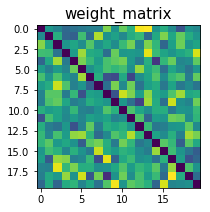

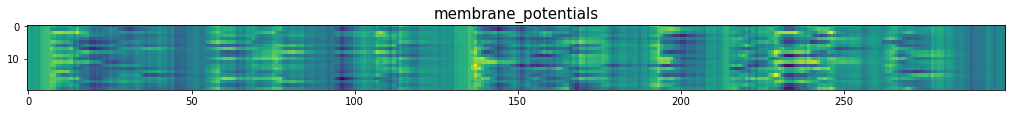

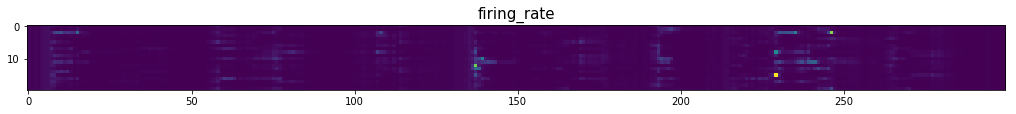

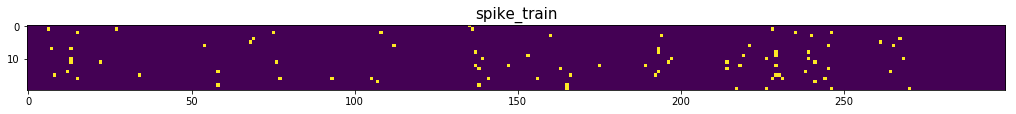

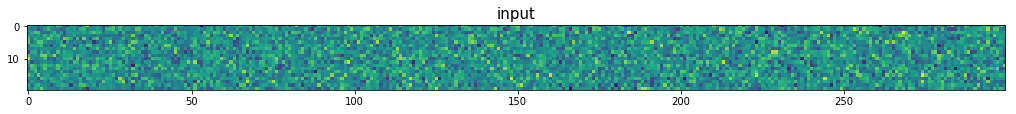

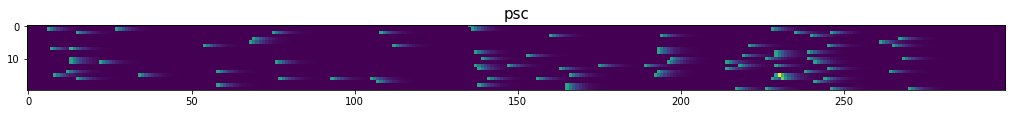

In [168]:
a = recurrent_network(param)

a.forward()
a.plot()

(-2, 2)

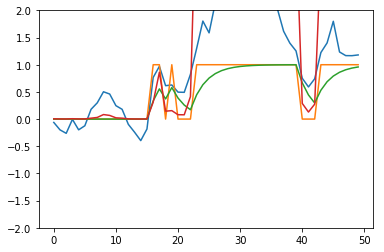

In [138]:
plt.plot(a.membrane_potentials[1])
# plt.plot(a.rho_0 * np.exp(a.membrane_potentials[0]))
plt.plot(a.spike_train[1])
plt.plot(a.psc[1])
plt.plot(a.firing_rate[1])
plt.ylim(-2,2)

0.9999821594038415

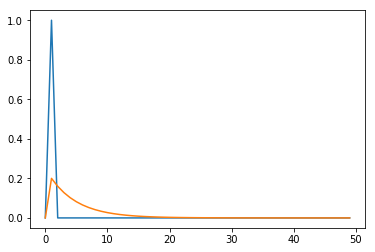

In [52]:
spike_train = np.zeros(50)
spike_train[1] = 1
psc = np.zeros(50)

integ = np.zeros(50)
tau = 5
decay = 1-1/5

temp = 0
for i in range(50):
    psc[i] = temp * decay + spike_train[i] * (1/5)
    temp = psc[i]
plt.plot(spike_train)
plt.plot(psc)
np.sum(psc)

